## Introduction


Parte do material utilizado para desenvolver esse projeto, assim como as referências foram retiradas do artigo de exemplo para o projeto ...


## Challenge


## Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

## Import Data


In [2]:
train = pd.read_csv("data/training.csv")
test = pd.read_csv("data/test.csv")

check_agreement = pd.read_csv("data/check_agreement.csv")
check_correlation = pd.read_csv("data/check_correlation.csv")

## Exploratory Data Analysis (EDA)


### training.csv


In [3]:
train.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,DOCAthree,IP_p0p2,IP_p1p2,isolationa,isolationb,isolationc,isolationd,isolatione,isolationf,iso,CDF1,CDF2,CDF3,ISO_SumBDT,p0_IsoBDT,p1_IsoBDT,p2_IsoBDT,p0_track_Chi2Dof,p1_track_Chi2Dof,p2_track_Chi2Dof,p0_IP,p1_IP,p2_IP,p0_IPSig,p1_IPSig,p2_IPSig,p0_pt,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,0.060602,0.083660,0.208855,0.074343,8,5,7,1.0,0.0,3.0,4.0,0.473952,0.349447,0.329157,-0.579324,-0.256309,-0.215444,-0.107570,1.921700,0.866657,1.230708,0.988054,0.601483,0.277090,16.243183,4.580875,5.939936,353.819733,448.369446,1393.246826,3842.096436,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,0.019245,0.030784,0.336345,0.173161,7,12,2,0.0,1.0,1.0,2.0,0.325785,0.265939,0.192599,-0.873926,-0.223774,-0.224871,-0.425281,0.958776,0.858357,1.810709,0.098752,0.219099,0.614524,3.610463,15.555593,11.238523,656.524902,2033.918701,747.137024,8299.368164,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,0.047947,0.096829,0.169165,0.079789,1,0,1,0.0,0.0,0.0,0.0,1.000000,0.786482,0.557760,-0.479636,-0.202451,-0.100762,-0.176424,0.720973,1.408519,1.038347,0.186143,0.215668,0.371820,4.851371,11.590331,13.723293,658.523743,2576.380615,963.652466,11323.134766,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,0.006417,0.044816,0.050989,0.068167,2,2,4,0.0,0.0,0.0,0.0,1.000000,0.501195,0.501195,-0.439453,-0.162267,-0.176424,-0.100762,1.172767,2.044164,0.811454,0.255752,0.210698,0.392195,7.292110,8.778173,16.462036,1047.216187,1351.734131,1685.003662,11502.081055,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,0.037326,0.019026,0.172065,0.131732,0,2,0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.639926,-0.822285,-0.291524,-0.261078,-0.269682,1.523252,0.435325,0.581312,0.270755,0.183355,0.630763,6.783962,3.342091,17.252840,1442.538208,1755.792236,1282.428711,74117.117188,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67553 entries, 0 to 67552
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   67553 non-null  int64  
 1   LifeTime             67553 non-null  float64
 2   dira                 67553 non-null  float64
 3   FlightDistance       67553 non-null  float64
 4   FlightDistanceError  67553 non-null  float64
 5   IP                   67553 non-null  float64
 6   IPSig                67553 non-null  float64
 7   VertexChi2           67553 non-null  float64
 8   pt                   67553 non-null  float64
 9   DOCAone              67553 non-null  float64
 10  DOCAtwo              67553 non-null  float64
 11  DOCAthree            67553 non-null  float64
 12  IP_p0p2              67553 non-null  float64
 13  IP_p1p2              67553 non-null  float64
 14  isolationa           67553 non-null  int64  
 15  isolationb           67553 non-null 

##### Production


In [5]:
train["production"].unique()

array([-99,   1,   4,   8,   9,   5,   2,   6,   3,   7,  10])

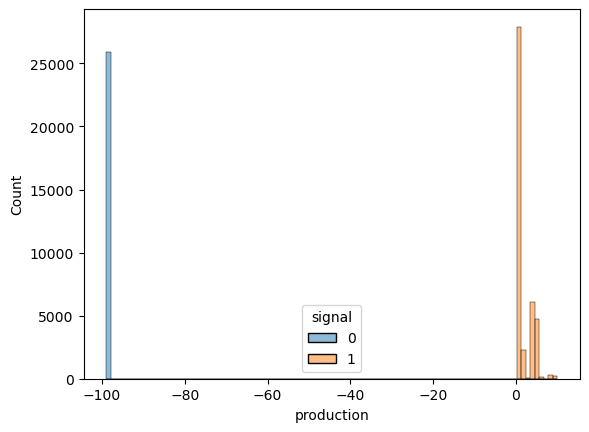

In [6]:
sns.histplot(train, x="production", bins=100, hue="signal")
plt.show()

##### Mass


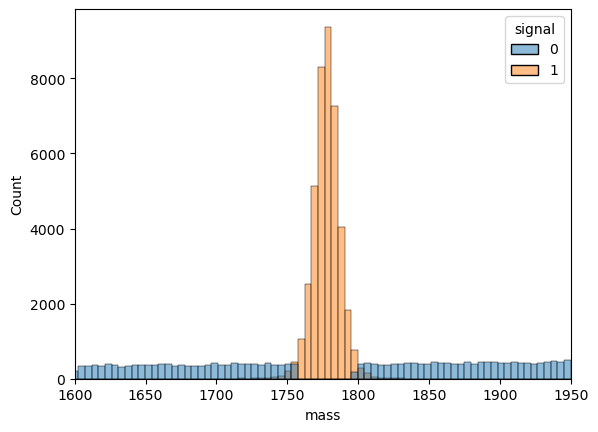

In [7]:
sns.histplot(train, x="mass", bins=100, hue="signal")
plt.xlim(1600, 1950)
plt.show()

É possível observar que a massa é uma característica essencial para o modelo separar o sinal do ruído.


##### min_ANNmuon


Muon identification. LHCb collaboration trains Artificial Neural Networks (ANN) from informations from RICH, ECAL, HCAL, Muon system to distinguish muons from other particles. This variables denotes the minimum of the three muons ANN. **min ANNmuon should not be used for training**. This variable is absent in the test samples


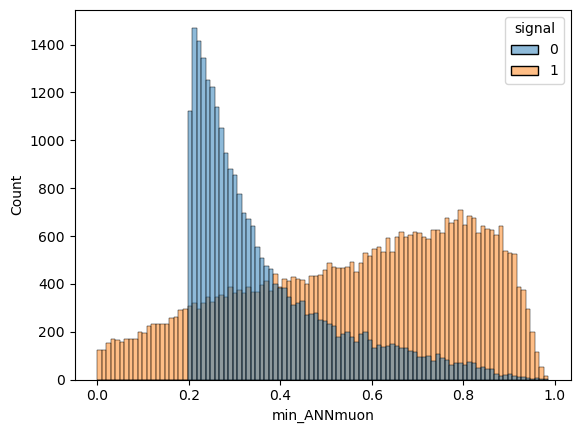

In [8]:
sns.histplot(train, x="min_ANNmuon", bins=100, hue="signal")
plt.show()

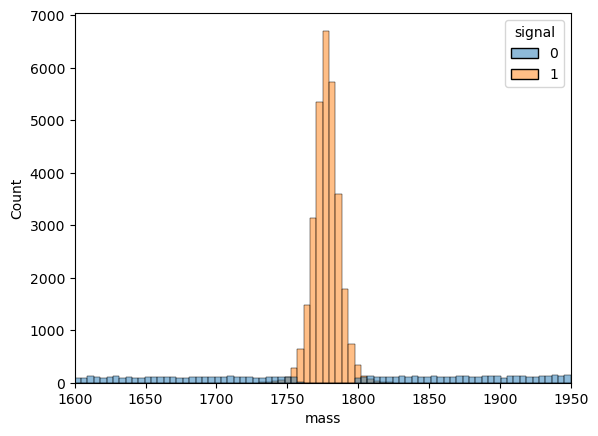

In [9]:
cond_muon = train["min_ANNmuon"] > 0.4
sns.histplot(train[cond_muon], x="mass", bins=100, hue="signal")
plt.xlim(1600, 1950)
plt.show()

#### features


In [10]:
features = [
    # Tau parameters
    "LifeTime",  # Life time of tau candidate.
    "dira",  # Cosine of the angle between the τ momentum and line between PV and tau vertex.
    "pt",  # Transverse momentum of τ
    "FlightDistance",  # Distance between τ and primary vertex (PV)
    "FlightDistanceError",
    "VertexChi2",
    "IP",  # Impact Parameter of tau candidate.
    "IPSig",  # Significance of Impact Parameter
    "mass",
    # Muons parameters
    ## Impact
    "p0_IP",
    "p1_IP",
    "p2_IP",
    "p0_IPSig",
    "p1_IPSig",
    "p2_IPSig",
    "IP_p0p2",  # Impact parameter of the p0 and p2 pair.
    "IP_p1p2",
    ## Kinematics
    "p0_pt",  # Transverse momentum
    "p1_pt",
    "p2_pt",
    "p0_p",  # Momentum
    "p1_p",
    "p2_p",
    "p0_eta",  # Pseudorapidity
    "p1_eta",
    "p2_eta",
    "DOCAone",  # Distance of Closest Approach between p0 and p1
    "DOCAthree",
    "DOCAtwo",
    # "SPDhits",  # Hits in the SPD (Spin Physics Detector)
    ## Track
    "iso",  # Track isolation variable.
    "isolationa",
    "isolationb",
    "isolationc",
    "isolationd",
    "isolatione",
    "isolationf",
    "ISO_SumBDT",
    "p0_IsoBDT",
    "p1_IsoBDT",
    "p2_IsoBDT",
    "p0_track_Chi2Dof",  #  Quality of p0 muon track.
    "p1_track_Chi2Dof",
    "p2_track_Chi2Dof",
    ## Cone
    "CDF1",  # Cone isolation variable
    "CDF2",
    "CDF3",
]

aux_features = [
    "production",
    "signal",
    "id",
    "min_ANNmuon",
]

In [11]:
len(features)

46

### test.csv


- signal
- mass
- min_ANNmuon
- production


In [12]:
test.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,DOCAthree,IP_p0p2,IP_p1p2,isolationa,isolationb,isolationc,isolationd,isolatione,isolationf,iso,CDF1,CDF2,CDF3,ISO_SumBDT,p0_IsoBDT,p1_IsoBDT,p2_IsoBDT,p0_track_Chi2Dof,p1_track_Chi2Dof,p2_track_Chi2Dof,p0_IP,p1_IP,p2_IP,p0_IPSig,p1_IPSig,p2_IPSig,p0_pt,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits
0,14711831,0.001273,0.999816,8.569642,0.310039,0.197893,5.183939,2.286117,687.479248,0.022301,0.050763,0.124735,0.148945,0.065997,0,1,4,2.0,2.0,0.0,4.0,0.448872,0.411983,0.141371,-0.751272,-0.145808,-0.280569,-0.324895,0.753610,1.846906,1.031751,0.329494,0.872634,0.686377,3.465280,10.841214,22.478136,508.926514,306.629456,714.222717,30300.734375,5662.158691,7406.368164,4.779700,3.608334,3.029715,705
1,16316387,0.000661,0.999954,7.061379,0.348772,0.067430,6.316281,3.865824,5691.845703,0.002455,0.037633,0.005614,0.116943,0.117106,19,6,9,3.0,0.0,3.0,6.0,0.389287,0.187060,0.076054,-0.347637,-0.115879,-0.115879,-0.115879,2.076739,1.069274,1.009442,0.457204,0.150543,0.165927,13.728366,10.874161,8.310439,943.130676,3287.291260,1563.593994,6160.323730,43781.566406,19728.500000,2.563915,3.280884,3.226650,907
2,6771382,0.000889,0.999999,6.502967,0.273914,0.011020,0.865816,1.004631,5429.225586,0.002753,0.036379,0.040004,0.110153,0.183199,0,3,1,0.0,0.0,0.0,0.0,1.000000,0.960757,0.960757,-0.777667,-0.222446,-0.222446,-0.332776,1.194183,0.710145,1.094024,0.162487,0.199006,0.564369,9.725705,13.215377,11.707615,2886.055908,2216.936279,598.068359,26387.134766,15534.978516,6504.145020,2.903129,2.634985,3.077517,213
3,686045,0.001295,0.999301,7.838184,0.325697,0.388636,11.391245,10.345356,661.717834,0.008163,0.436003,0.188972,0.458021,0.551724,9,5,1,2.0,0.0,1.0,3.0,0.352854,0.143209,0.137221,-0.482896,-0.084681,-0.100762,-0.297453,1.512858,1.091243,1.011030,0.656599,0.304019,0.801548,17.860973,3.498727,16.569244,461.727753,357.967560,1118.084229,5451.857422,10281.403320,23722.742188,3.160085,4.050494,3.747409,275
4,8755882,0.001714,0.999805,7.064559,0.113440,0.154421,13.925871,12.951378,3885.417969,0.066317,0.052183,0.029873,0.376774,0.412828,13,6,6,0.0,2.0,1.0,3.0,0.313903,0.250328,0.240195,-0.451658,-0.115879,-0.183488,-0.152291,1.555909,1.221972,1.544137,0.546148,0.417822,0.828005,44.483707,24.498425,20.247360,1773.747925,1643.278198,711.572205,7724.954590,12830.546875,6008.145996,2.151059,2.744157,2.823017,357


In [13]:
test.shape[1]

47

### check_agreement.csv


- production
- mass
- min_ANNmuon


In [14]:
check_agreement.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,DOCAthree,IP_p0p2,IP_p1p2,isolationa,isolationb,isolationc,isolationd,isolatione,isolationf,iso,CDF1,CDF2,CDF3,ISO_SumBDT,p0_IsoBDT,p1_IsoBDT,p2_IsoBDT,p0_track_Chi2Dof,p1_track_Chi2Dof,p2_track_Chi2Dof,p0_IP,p1_IP,p2_IP,p0_IPSig,p1_IPSig,p2_IPSig,p0_pt,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,signal,weight
0,15347063,0.001451,0.999964,6.945030,0.229196,0.058117,2.961298,7.953543,2251.611816,0.082219,0.084005,0.066887,0.185107,0.214719,8,6,1,2.0,1.0,1.0,4.0,0.732076,0.492269,0.179091,-0.207475,-0.019306,-0.089797,-0.098372,0.606178,0.862549,1.487057,0.483199,0.474925,0.426797,24.701061,10.732132,8.853514,1438.064697,468.645721,834.562378,10392.814453,6380.673828,15195.594727,2.666142,3.302978,3.594246,512,0,-0.307813
1,14383299,0.000679,0.999818,9.468235,0.517488,0.189683,14.413060,7.141451,10594.470703,0.007983,0.044154,0.001321,0.039357,0.217507,5,6,17,1.0,1.0,1.0,3.0,0.802508,0.605835,0.584701,-0.659644,-0.278330,-0.186370,-0.194944,1.900118,1.073474,1.336784,0.712242,0.260311,0.123877,11.312134,16.435398,7.737038,316.791351,7547.703613,2861.309814,3174.356934,64480.023438,23134.953125,2.995265,2.834816,2.779366,552,0,-0.331421
2,7382797,0.003027,0.999847,13.280714,0.219291,0.231709,11.973175,4.778880,2502.196289,0.045085,0.106614,0.005850,0.335788,0.885080,2,2,1,0.0,0.0,1.0,1.0,0.682607,0.682607,0.295038,-0.399239,-0.115879,-0.131069,-0.152291,0.660675,1.683084,0.798658,0.381544,1.163556,1.290409,16.435801,20.686119,44.521961,1887.477905,317.579529,932.128235,15219.761719,3921.181641,10180.791016,2.776633,3.204923,3.081832,318,0,-0.382215
3,6751065,0.000810,0.999998,5.166821,0.167886,0.011298,0.891142,5.528002,5097.813965,0.055115,0.038642,0.003864,0.076522,0.068347,4,4,3,0.0,0.0,0.0,0.0,0.533615,0.533615,0.533615,-0.821041,-0.208248,-0.177802,-0.434991,0.770563,1.093031,0.938619,0.564650,0.164411,0.166646,24.878387,7.873435,9.630725,975.041687,1650.837524,2617.248291,4365.082520,13221.149414,24291.875000,2.179345,2.769762,2.918251,290,0,1.465194
4,9439580,0.000706,0.999896,10.897236,0.284975,0.160511,16.367550,8.670339,20388.097656,0.015587,0.020872,0.014612,0.249906,0.139937,0,1,0,0.0,0.0,0.0,0.0,0.926410,0.926410,0.926410,-1.116815,-0.328938,-0.443564,-0.344313,1.080559,1.471946,1.123868,0.373736,0.230584,0.112430,28.557213,18.738485,7.389726,6035.000977,9657.492188,4763.682617,27463.011719,46903.394531,24241.628906,2.196114,2.262732,2.310401,45,0,-0.477084


In [15]:
check_agreement.shape[1]

49

### check_correlation.csv


- signal
- production
- min_ANNmuon


In [16]:
check_correlation.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,DOCAthree,IP_p0p2,IP_p1p2,isolationa,isolationb,isolationc,isolationd,isolatione,isolationf,iso,CDF1,CDF2,CDF3,ISO_SumBDT,p0_IsoBDT,p1_IsoBDT,p2_IsoBDT,p0_track_Chi2Dof,p1_track_Chi2Dof,p2_track_Chi2Dof,p0_IP,p1_IP,p2_IP,p0_IPSig,p1_IPSig,p2_IPSig,p0_pt,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,mass
0,11120335,0.000703,0.999715,2.927074,0.214014,0.081302,4.259793,1.066585,3108.189941,0.010767,0.024147,0.003066,0.100619,0.087596,2,10,5,2.0,1.0,1.0,4.0,0.661286,0.592280,0.592280,-0.229346,-0.089797,-0.049752,-0.089797,1.015762,0.918588,2.555963,0.336053,0.138520,0.239775,6.975648,7.199831,9.638602,1142.124512,1294.450928,1073.976440,9274.671875,7963.914062,6712.897949,2.783731,2.503310,2.519349,280,1723.887939
1,11495369,0.000601,0.999950,15.849142,0.842973,0.182213,13.882857,5.780046,6858.264648,0.007574,0.020010,0.064194,0.058354,0.247012,3,3,4,0.0,1.0,1.0,2.0,0.744360,0.441476,0.209664,-0.364786,-0.115879,-0.124454,-0.124454,1.413934,0.696266,1.531379,0.282444,0.298322,0.168395,10.620588,17.345636,7.344349,1174.860229,3981.284912,1859.680542,22844.791016,109955.101562,37051.800781,3.660059,4.011287,3.684429,386,1926.284058
2,7098902,0.002009,0.999984,43.358494,1.323199,0.200158,12.870687,3.460782,3604.347412,0.052849,0.127547,0.073476,0.365799,0.292673,0,1,0,0.0,0.0,0.0,0.0,0.699672,0.678214,0.437321,-1.175178,-0.351104,-0.414748,-0.409326,1.307686,1.081815,0.674668,0.173122,0.480514,1.041596,4.409735,30.871080,7.409998,1046.867310,2564.430420,354.095032,45214.070312,77265.429688,12087.007812,4.458619,4.098382,4.223254,433,1830.873047
3,8103692,0.001268,0.999550,6.910733,0.198652,0.167730,8.559438,7.676139,3240.960449,0.101368,0.002148,0.037449,0.060147,0.162985,4,9,4,1.0,1.0,1.0,3.0,0.257655,0.184313,0.182857,-0.495822,-0.194944,-0.176424,-0.124454,1.019122,2.248540,1.243463,0.390963,0.627191,0.136959,11.687304,31.343948,4.312659,1051.328979,1178.332031,1285.701660,11245.551758,6770.969238,17003.119141,3.060873,2.434033,3.273807,245,1909.119019
4,10160864,0.001937,0.999996,36.135208,0.508036,0.097170,9.295684,0.426340,6448.445312,0.007005,0.008510,0.009841,0.481759,0.455559,0,4,0,0.0,0.0,0.0,0.0,0.588020,0.537217,0.222616,-0.766796,-0.263475,-0.263475,-0.239847,0.766173,0.715839,0.847636,0.612008,0.498065,0.641609,38.172073,38.144756,14.099512,3081.089111,3140.512207,385.343475,48171.457031,43973.835938,7368.522949,3.441606,3.331079,3.643300,489,1600.925049


In [17]:
check_correlation.shape[1]

48

### Preprocessing


#### Feature Engineering


##### Mass reconstruction


In LHCb, the z axis is choosen to be the direction of the beam, as shown with red arrows


- Kinematic relations


In [18]:
## We can calculate the longitudinal momentum (pz) with transverse momentum and pseudorapidity or momentum
def calc_pz(df, method="momentum"):
    if method == "momentum":
        p0_z = np.sqrt(np.square(df["p0_p"]) - np.square(df["p0_pt"]))
        p1_z = np.sqrt(np.square(df["p1_p"]) - np.square(df["p1_pt"]))
        p2_z = np.sqrt(np.square(df["p2_p"]) - np.square(df["p2_pt"]))
    elif method == "pseudorapidity":
        p0_z = df["p0_pt"] * np.sinh(df["p0_eta"])
        p1_z = df["p1_pt"] * np.sinh(df["p1_eta"])
        p2_z = df["p2_pt"] * np.sinh(df["p2_eta"])
    pz = p0_z + p1_z + p2_z
    return pz


def calc_p(df):
    p = np.sqrt(np.square(df["pt"]) + np.square(calc_pz(df)))
    return p


def calc_e(df):
    MUON_MASS = 105.66  # MeV
    e0 = np.sqrt(np.square(MUON_MASS) + np.square(df["p0_p"]))
    e1 = np.sqrt(np.square(MUON_MASS) + np.square(df["p1_p"]))
    e2 = np.sqrt(np.square(MUON_MASS) + np.square(df["p2_p"]))
    e = e0 + e1 + e2
    return e


def calc_mass(df):
    e = calc_e(df)
    p = calc_p(df)
    mass = np.sqrt(np.square(e) - np.square(p))
    return mass

- Mass estimation analysis


In [19]:
mass = calc_mass(train)

c:\Users\jonh\AppData\Local\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


A massa do tau é de aproximadamente 1777.68 MeV.


In [20]:
mass.mean()

np.float64(1779.8431182374684)

O resultado foi bem próximo ao esperado.


In [21]:
mass.std()

77.36910229257754

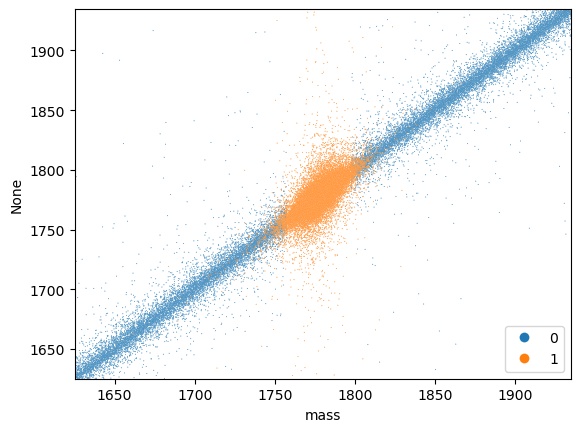

In [22]:
stds = 2
start = mass.mean() - (mass.std() * stds)
end = mass.mean() + (mass.std() * stds)
sns.scatterplot(data=train, x="mass", y=mass, s=0.5, hue="signal")
plt.xlim(start, end)
plt.ylim(start, end)
plt.legend(markerscale=10)
plt.show()

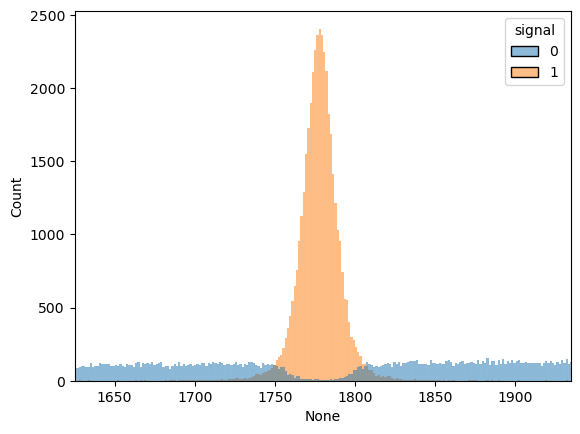

In [23]:
sns.histplot(data=train, x=mass, hue="signal")
plt.xlim(start, end)
plt.show()

##### Add mass


In [24]:
test["mass"] = calc_mass(test)
check_agreement["mass"] = calc_mass(check_agreement)

c:\Users\jonh\AppData\Local\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jonh\AppData\Local\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
print(
    f'Valor médio da massa do Tau {test["mass"].mean():.3f} GeV nos dados de agreement.'
)
print(f'O desvio padrão foi de {test["mass"].std():.3f} GeV nos dados de agreement.')

Valor médio da massa do Tau 1942.239 GeV nos dados de agreement.
O desvio padrão foi de 70.761 GeV nos dados de agreement.


In [26]:
print(
    f'Valor médio da massa do Tau {check_agreement["mass"].mean():.3f} GeV nos dados de agreement.'
)
print(
    f'O desvio padrão foi de {check_agreement["mass"].std():.3f} GeV nos dados de agreement.'
)

Valor médio da massa do Tau 1959.629 GeV nos dados de agreement.
O desvio padrão foi de 38.873 GeV nos dados de agreement.


#### Data


In [220]:
X_train = train[features][cond_muon].values
X_test = test[features].values
X_agre = check_agreement[features].values
X_corr = check_correlation[features].values

In [221]:
y_train = train["signal"][cond_muon].values

In [222]:
y_train

array([0, 0, 0, ..., 1, 1, 1], shape=(38012,))

#### Scaling


Como também pretendemos utilizar um modelo de rede neural, vamos escalonar os dados.


In [223]:
from tensorflow.keras import layers

In [224]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

In [225]:
X_train_scaled = normalizer(X_train)
X_test_scaled = normalizer(X_test)
X_agre_scaled = normalizer(X_agre)
X_corr_scaled = normalizer(X_corr)

#### PCA


Considerando a natureza dos dados da Física de Altas Energias, o PCA pode não ser a técnica indicada. Isso porque seus atributos possuem significado físico direto, o que pode ser distorcido pela redução de dimensionalidade. Além disso, a presença de relações não lineares entre os atributos pode limitar a efetividade do PCA.


In [226]:
from sklearn.decomposition import PCA

In [227]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [228]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)

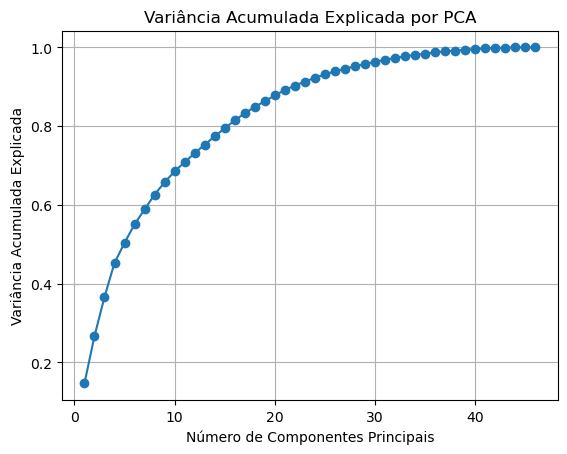

In [229]:
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker="o")
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Acumulada Explicada")
plt.title("Variância Acumulada Explicada por PCA")
plt.grid(True)
plt.show()

In [230]:
len(cum_variance[cum_variance < 0.91])

22

A variância acumulada atingiu 90% com 22 componentes principais. Notamos também, a ausência de um “cotovelo” acentuado nas primeiras componentes, do gráfico de variância explicada, ideal para a aplicação do PCA. Em função disso, optamos por não utilizar essa técnica.


## Model


### XGB


In [231]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [232]:
from sklearn.metrics import roc_auc_score
from evaluation import roc_auc_truncated, compute_cvm, check_ks

In [233]:
params = {
    "objective": "binary:logistic",
    "eta": 0.05,
    "max_depth": 100,
    "colsample_bytree": 0.4,
    "eval_metric": "auc",
    "random_state": 23,
}

In [234]:
xgb_model = xgb.train(
    params,
    xgb.DMatrix(X_train, y_train),
)

In [235]:
y_train_hat_xgb = xgb_model.predict(xgb.DMatrix(X_train))
y_agre_hat_xgb = xgb_model.predict(xgb.DMatrix(X_agre))
y_corr_hat_xgb = xgb_model.predict(xgb.DMatrix(X_corr))

In [236]:
from sklearn.metrics import roc_auc_score
from evaluation import roc_auc_truncated, compute_cvm, check_ks

In [237]:
roc_auc_score(y_true=y_train, y_score=y_train_hat_xgb)

np.float64(0.999950218813777)

In [238]:
check_ks(agreement_probs=y_agre_hat_xgb, check_agreement=check_agreement)

np.float64(0.03455944345861123)

In [239]:
compute_cvm(predictions=y_corr_hat_xgb, masses=check_correlation["mass"])

np.float64(0.07205998986353737)

### Neural Network


In [240]:
import tensorflow as tf
from tensorflow import keras

In [282]:
nn_model = keras.Sequential(
    [
        keras.layers.Dense(50, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

nn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [284]:
nn_model.fit(normalizer(X_train), y_train, epochs=35, verbose=1)  # 4min

Epoch 1/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9920 - loss: 0.0265
Epoch 2/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9919 - loss: 0.0255
Epoch 3/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9929 - loss: 0.0225
Epoch 4/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9926 - loss: 0.0220
Epoch 5/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9927 - loss: 0.0236
Epoch 6/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9928 - loss: 0.0213
Epoch 7/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9921 - loss: 0.0213
Epoch 8/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9928 - loss: 0.0206
Epoch 9/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9951 - loss: 0.0163
Epoch 10/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9944 - loss: 0.0150
Epoch 11/35
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9951 - loss: 0.0152
Epoch 12/35
1188/1188 ━━━━━

In [285]:
y_train_hat_mlp = np.ravel(nn_model.predict(X_train_scaled))

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step


In [286]:
y_agre_hat_mlp = np.ravel(nn_model.predict(X_agre_scaled))

10349/10349 ━━━━━━━━━━━━━━━━━━━━ 9s 896us/step


In [287]:
y_corr_hat_mlp = np.ravel(nn_model.predict(X_corr_scaled))

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


In [288]:
roc_auc_score(y_true=y_train, y_score=y_train_hat_mlp)

np.float64(0.9999798880612524)

In [289]:
check_ks(agreement_probs=y_agre_hat_mlp, check_agreement=check_agreement)

np.float64(0.2669897748987808)

In [290]:
compute_cvm(predictions=np.ravel(y_corr_hat_mlp), masses=check_correlation["mass"])

np.float64(0.11344693732854372)

### Random Forest


In [300]:
from sklearn.ensemble import RandomForestClassifier

In [301]:
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42, n_jobs=-1
)

In [302]:
rf_model.fit(X_train_scaled, y_train)

y_train_hat_rf = rf_model.predict(X_train_scaled)
y_agre_hat_rf = rf_model.predict(X_agre_scaled)
y_corr_hat_rf = rf_model.predict(X_corr_scaled)

In [303]:
roc_auc_score(y_true=y_train, y_score=y_train_hat_rf)

np.float64(0.9847829374979976)

In [304]:
check_ks(agreement_probs=y_agre_hat_rf, check_agreement=check_agreement)

np.float64(0.0054635750478476686)

In [305]:
compute_cvm(predictions=np.ravel(y_corr_hat_rf), masses=check_correlation["mass"])

np.float64(0.11992186814757975)

### Ensemble


In [306]:
nn_model, xgb_model, rf_model

(<Sequential name=sequential_2, built=True>,
 RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42))

In [307]:
weight_xgb = 0.45
weight_mlp = 0.2
weight_rf = 1 - (weight_xgb + weight_mlp)

In [313]:
train_result = [y_train_hat_xgb, y_train_hat_mlp, y_train_hat_rf]
corr_result = [y_corr_hat_xgb, y_corr_hat_mlp, y_corr_hat_rf]
agre_result = [y_agre_hat_xgb, y_agre_hat_mlp, y_agre_hat_rf]

In [323]:
train_result_weighted = (
    train_result[0] * weight_xgb
    + train_result[1] * weight_mlp
    + train_result[2] * weight_rf
)
agre_result_weighted = (
    agre_result[0] * weight_xgb
    + agre_result[1] * weight_mlp
    + agre_result[2] * weight_rf
)* 1
    / 3
corr_result_weighted = (
    (
        (
            corr_result[0] * weight_xgb
            + corr_result[1] * weight_mlp
            + corr_result[2] * weight_rf
        )
    )
    * 1
    / 3
)

## Evaluation


### ROC


In [324]:
roc_auc_score(y_true=y_train, y_score=train_result_weighted)

np.float64(0.999984148957328)

### Agreement


In [325]:
check_ks(agreement_probs=agre_result_weighted, check_agreement=check_agreement)

np.float64(0.03492895499198445)

### Correlation


In [326]:
compute_cvm(predictions=corr_result_weighted, masses=check_correlation["mass"])

np.float64(0.07094648618171709)